# Deep Hedging for a nonlinear generalized affine process - Lookback put option

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import style
style.use('ggplot')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from mpl_toolkits.mplot3d import Axes3D
from Functions import*
from matplotlib import rcParams

In [2]:
#physical_devices = tf.config.list_physical_devices('GPU') 

We first write a function to generate paths of the SDE, that we have given in (3.1),
$$
d X_t = (b_0+b_1 X_t) dt + (a_0+a_1 X_t)^\gamma dW_t,~t\geq 0,\\
X_0 = x_0
$$
using the Euler-Maruyama Method, i.e., through
$$
X_{i+1} = X_i+(b_0+b_1 X_i) \Delta t_i +(a_0+a_1 X_i)^\gamma  \Delta W_i,~i=1,\dots,n
$$
with $\Delta t_i = T/n$ and $\Delta W_i = W_{(i+1)T/n}-W_{iT/n}$ and $X_0 = x_0$

Test it in a purely nonlinear setting:

$$
d X_t = (b_0+b_1 X_t) dt + (a_0+a_1 X_t)^\gamma dW_t
$$

for the parameter intervals specified in (5.11)

\begin{align}
a_0 &\in [0.2,1.0] \\
a_1 &\in [0.5,0.7] \\
b_0 &\in [-0.3,0.3] \\
b_1 &\in [-0.2,0.2] \\
\gamma &\in [0.5,1.5]
\end{align}

We specify the lookback put option payoff as:
$$
\Phi(X)= (13-\min((X)_{0\leq t \leq T}))^+
$$

We now write a function to determine the optimal hedge based on a deep learning approach

## Training of a hedging strategy with uncertain parameters as specified above

In [3]:
T = 21 / 365 
n = 21 
a_0 = [0.2,1.0]
a_1 = [0.5,0.7]
b_0 = [-0.3,0.3]
b_1 = [-0.2,0.2]
gamma = [0.5,1.5]
x_0 = 15.
def derivative(path):
    return tf.nn.relu(13-tf.math.reduce_min(path))

price, hedge = optimal_hedge(derivative,a_0,a_1,b_0,b_1,gamma,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 1000,l_r = 0.0075,BATCH_SIZE =256)

  1%|          | 11/1000 [00:14<22:39,  1.38s/it]

Iteration:10, Price of Hedge: 0.743407666683197, Loss: 2.0311532020568848


  2%|▏         | 21/1000 [00:27<22:20,  1.37s/it]

Iteration:20, Price of Hedge: 0.739905595779419, Loss: 1.1628495454788208


  3%|▎         | 31/1000 [00:39<22:02,  1.37s/it]

Iteration:30, Price of Hedge: 0.7452000379562378, Loss: 0.823693037033081


  4%|▍         | 41/1000 [00:52<19:17,  1.21s/it]

Iteration:40, Price of Hedge: 0.737449586391449, Loss: 0.8167018294334412


  5%|▌         | 51/1000 [01:04<17:25,  1.10s/it]

Iteration:50, Price of Hedge: 0.7461351752281189, Loss: 0.7200369834899902


  6%|▌         | 61/1000 [01:18<21:35,  1.38s/it]

Iteration:60, Price of Hedge: 0.7386404871940613, Loss: 0.7189627289772034


  7%|▋         | 71/1000 [01:31<20:56,  1.35s/it]

Iteration:70, Price of Hedge: 0.7333506345748901, Loss: 0.5650993585586548


  8%|▊         | 81/1000 [01:43<19:53,  1.30s/it]

Iteration:80, Price of Hedge: 0.7334392070770264, Loss: 0.5637143850326538


  9%|▉         | 91/1000 [01:56<18:09,  1.20s/it]

Iteration:90, Price of Hedge: 0.7514721751213074, Loss: 0.46062299609184265


 10%|█         | 101/1000 [02:09<16:33,  1.11s/it]

Iteration:100, Price of Hedge: 0.7572866082191467, Loss: 0.5398502349853516


 11%|█         | 111/1000 [02:23<21:16,  1.44s/it]

Iteration:110, Price of Hedge: 0.7520841360092163, Loss: 0.4736737012863159


 12%|█▏        | 121/1000 [02:37<21:13,  1.45s/it]

Iteration:120, Price of Hedge: 0.7474945783615112, Loss: 0.45567646622657776


 13%|█▎        | 131/1000 [02:50<17:54,  1.24s/it]

Iteration:130, Price of Hedge: 0.7558413147926331, Loss: 0.5924027562141418


 14%|█▍        | 141/1000 [03:04<19:58,  1.40s/it]

Iteration:140, Price of Hedge: 0.7557855844497681, Loss: 0.35231608152389526


 15%|█▌        | 151/1000 [03:17<18:37,  1.32s/it]

Iteration:150, Price of Hedge: 0.7396427392959595, Loss: 0.5788977146148682


 16%|█▌        | 161/1000 [03:31<17:18,  1.24s/it]

Iteration:160, Price of Hedge: 0.7423197627067566, Loss: 0.4669497609138489


 17%|█▋        | 171/1000 [03:45<18:09,  1.31s/it]

Iteration:170, Price of Hedge: 0.746446430683136, Loss: 0.38453978300094604


 18%|█▊        | 181/1000 [03:59<19:23,  1.42s/it]

Iteration:180, Price of Hedge: 0.7420414090156555, Loss: 0.4696725606918335


 19%|█▉        | 191/1000 [04:11<18:33,  1.38s/it]

Iteration:190, Price of Hedge: 0.7227468490600586, Loss: 0.5204864740371704


 20%|██        | 201/1000 [04:25<18:28,  1.39s/it]

Iteration:200, Price of Hedge: 0.727336585521698, Loss: 0.5226102471351624


 21%|██        | 211/1000 [04:39<18:19,  1.39s/it]

Iteration:210, Price of Hedge: 0.7333085536956787, Loss: 0.5881413221359253


 22%|██▏       | 221/1000 [04:53<16:59,  1.31s/it]

Iteration:220, Price of Hedge: 0.7276392579078674, Loss: 0.4412391781806946


 23%|██▎       | 231/1000 [05:06<16:27,  1.28s/it]

Iteration:230, Price of Hedge: 0.728449821472168, Loss: 0.4282519221305847


 24%|██▍       | 241/1000 [05:20<15:43,  1.24s/it]

Iteration:240, Price of Hedge: 0.7350829243659973, Loss: 0.30525916814804077


 25%|██▌       | 251/1000 [05:36<19:44,  1.58s/it]

Iteration:250, Price of Hedge: 0.7387348413467407, Loss: 0.40653711557388306


 26%|██▌       | 261/1000 [05:50<19:22,  1.57s/it]

Iteration:260, Price of Hedge: 0.7338924407958984, Loss: 1.1628233194351196


 27%|██▋       | 271/1000 [06:05<18:17,  1.51s/it]

Iteration:270, Price of Hedge: 0.7255367636680603, Loss: 0.638770341873169


 28%|██▊       | 281/1000 [06:20<20:24,  1.70s/it]

Iteration:280, Price of Hedge: 0.7216917872428894, Loss: 0.7672237157821655


 29%|██▉       | 291/1000 [06:35<18:58,  1.61s/it]

Iteration:290, Price of Hedge: 0.7396112680435181, Loss: 0.5419853925704956


 30%|███       | 301/1000 [06:48<14:01,  1.20s/it]

Iteration:300, Price of Hedge: 0.7427902817726135, Loss: 0.37516891956329346


 31%|███       | 311/1000 [07:03<20:14,  1.76s/it]

Iteration:310, Price of Hedge: 0.7377705574035645, Loss: 0.5284848809242249


 32%|███▏      | 321/1000 [07:22<21:04,  1.86s/it]

Iteration:320, Price of Hedge: 0.7391942143440247, Loss: 0.4236573874950409


 33%|███▎      | 331/1000 [07:40<21:30,  1.93s/it]

Iteration:330, Price of Hedge: 0.741527795791626, Loss: 0.4467245638370514


 34%|███▍      | 341/1000 [07:59<21:10,  1.93s/it]

Iteration:340, Price of Hedge: 0.733029305934906, Loss: 0.36643272638320923


 35%|███▌      | 351/1000 [08:17<18:46,  1.74s/it]

Iteration:350, Price of Hedge: 0.7317323088645935, Loss: 0.4199141561985016


 36%|███▌      | 361/1000 [08:35<18:26,  1.73s/it]

Iteration:360, Price of Hedge: 0.7402064204216003, Loss: 0.4880833029747009


 37%|███▋      | 371/1000 [08:53<18:16,  1.74s/it]

Iteration:370, Price of Hedge: 0.7415822744369507, Loss: 0.37426722049713135


 38%|███▊      | 381/1000 [09:10<17:59,  1.74s/it]

Iteration:380, Price of Hedge: 0.7436461448669434, Loss: 0.3653596043586731


 39%|███▉      | 391/1000 [09:29<18:39,  1.84s/it]

Iteration:390, Price of Hedge: 0.7244302034378052, Loss: 0.3220612406730652


 40%|████      | 401/1000 [09:47<19:00,  1.90s/it]

Iteration:400, Price of Hedge: 0.720811665058136, Loss: 0.32998552918434143


 41%|████      | 411/1000 [10:05<18:38,  1.90s/it]

Iteration:410, Price of Hedge: 0.7301998734474182, Loss: 0.4499764144420624


 42%|████▏     | 421/1000 [10:23<18:18,  1.90s/it]

Iteration:420, Price of Hedge: 0.7207806706428528, Loss: 0.4020548462867737


 43%|████▎     | 431/1000 [10:41<16:21,  1.72s/it]

Iteration:430, Price of Hedge: 0.7192559242248535, Loss: 0.2779572308063507


 44%|████▍     | 441/1000 [10:59<16:01,  1.72s/it]

Iteration:440, Price of Hedge: 0.7149311304092407, Loss: 0.43265002965927124


 45%|████▌     | 451/1000 [11:18<16:33,  1.81s/it]

Iteration:450, Price of Hedge: 0.7335262298583984, Loss: 0.4458882808685303


 46%|████▌     | 461/1000 [11:36<16:15,  1.81s/it]

Iteration:460, Price of Hedge: 0.7525075078010559, Loss: 0.4234579801559448


 47%|████▋     | 471/1000 [11:54<16:25,  1.86s/it]

Iteration:470, Price of Hedge: 0.7440317869186401, Loss: 0.4236759841442108


 48%|████▊     | 481/1000 [12:12<16:35,  1.92s/it]

Iteration:480, Price of Hedge: 0.72806316614151, Loss: 0.3999347686767578


 49%|████▉     | 491/1000 [12:31<16:04,  1.90s/it]

Iteration:490, Price of Hedge: 0.7325113415718079, Loss: 0.3712666630744934


 50%|█████     | 501/1000 [12:48<14:34,  1.75s/it]

Iteration:500, Price of Hedge: 0.7428171634674072, Loss: 0.3032524585723877


 51%|█████     | 511/1000 [13:06<13:21,  1.64s/it]

Iteration:510, Price of Hedge: 0.7357925176620483, Loss: 0.3320986032485962


 52%|█████▏    | 521/1000 [13:24<13:51,  1.74s/it]

Iteration:520, Price of Hedge: 0.7401893734931946, Loss: 0.3940344452857971


 53%|█████▎    | 531/1000 [13:43<14:26,  1.85s/it]

Iteration:530, Price of Hedge: 0.73478764295578, Loss: 0.350300669670105


 54%|█████▍    | 541/1000 [14:01<14:14,  1.86s/it]

Iteration:540, Price of Hedge: 0.7267181277275085, Loss: 0.3567458987236023


 55%|█████▌    | 551/1000 [14:19<14:23,  1.92s/it]

Iteration:550, Price of Hedge: 0.7325142621994019, Loss: 0.34694772958755493


 56%|█████▌    | 561/1000 [14:38<14:00,  1.92s/it]

Iteration:560, Price of Hedge: 0.723940372467041, Loss: 0.3017493486404419


 57%|█████▋    | 571/1000 [14:56<13:14,  1.85s/it]

Iteration:570, Price of Hedge: 0.7276254296302795, Loss: 0.24092629551887512


 58%|█████▊    | 581/1000 [15:13<11:33,  1.66s/it]

Iteration:580, Price of Hedge: 0.7323352694511414, Loss: 0.3287114202976227


 59%|█████▉    | 591/1000 [15:31<11:50,  1.74s/it]

Iteration:590, Price of Hedge: 0.727465808391571, Loss: 0.3516464829444885


 60%|██████    | 601/1000 [15:50<12:04,  1.82s/it]

Iteration:600, Price of Hedge: 0.720012366771698, Loss: 0.3289731740951538


 61%|██████    | 611/1000 [16:08<11:49,  1.82s/it]

Iteration:610, Price of Hedge: 0.74066162109375, Loss: 0.3639318346977234


 62%|██████▏   | 621/1000 [16:27<11:57,  1.89s/it]

Iteration:620, Price of Hedge: 0.7373013496398926, Loss: 0.5212249755859375


 63%|██████▎   | 631/1000 [16:45<11:45,  1.91s/it]

Iteration:630, Price of Hedge: 0.726686418056488, Loss: 0.32314515113830566


 64%|██████▍   | 641/1000 [17:05<10:57,  1.83s/it]

Iteration:640, Price of Hedge: 0.7327607274055481, Loss: 0.24024569988250732


 65%|██████▌   | 651/1000 [17:22<09:35,  1.65s/it]

Iteration:650, Price of Hedge: 0.7399629950523376, Loss: 0.3595029413700104


 66%|██████▌   | 661/1000 [17:41<10:08,  1.80s/it]

Iteration:660, Price of Hedge: 0.7365475296974182, Loss: 0.34558647871017456


 67%|██████▋   | 671/1000 [17:59<09:56,  1.81s/it]

Iteration:670, Price of Hedge: 0.73260098695755, Loss: 0.3402608036994934


 68%|██████▊   | 681/1000 [18:18<10:05,  1.90s/it]

Iteration:680, Price of Hedge: 0.7257653474807739, Loss: 0.27831149101257324


 69%|██████▉   | 691/1000 [18:36<09:36,  1.87s/it]

Iteration:690, Price of Hedge: 0.7230958342552185, Loss: 0.38388362526893616


 70%|███████   | 701/1000 [18:54<09:42,  1.95s/it]

Iteration:700, Price of Hedge: 0.728165328502655, Loss: 0.3281644582748413


 71%|███████   | 711/1000 [19:12<08:44,  1.81s/it]

Iteration:710, Price of Hedge: 0.7162237763404846, Loss: 0.3171752393245697


 72%|███████▏  | 721/1000 [19:30<07:36,  1.63s/it]

Iteration:720, Price of Hedge: 0.7273105978965759, Loss: 0.2789042890071869


 73%|███████▎  | 731/1000 [19:48<07:34,  1.69s/it]

Iteration:730, Price of Hedge: 0.7418153882026672, Loss: 0.3110983967781067


 74%|███████▍  | 741/1000 [20:06<07:45,  1.80s/it]

Iteration:740, Price of Hedge: 0.7374369502067566, Loss: 0.3757217526435852


 75%|███████▌  | 751/1000 [20:25<07:37,  1.84s/it]

Iteration:750, Price of Hedge: 0.7367473244667053, Loss: 0.29928600788116455


 76%|███████▌  | 761/1000 [20:43<07:23,  1.86s/it]

Iteration:760, Price of Hedge: 0.7434356808662415, Loss: 0.36849820613861084


 77%|███████▋  | 771/1000 [21:01<07:14,  1.90s/it]

Iteration:770, Price of Hedge: 0.7494732737541199, Loss: 0.3462200164794922


 78%|███████▊  | 781/1000 [21:19<06:53,  1.89s/it]

Iteration:780, Price of Hedge: 0.7380396723747253, Loss: 0.4170997738838196


 79%|███████▉  | 791/1000 [21:37<06:00,  1.73s/it]

Iteration:790, Price of Hedge: 0.7247951626777649, Loss: 0.4297142028808594


 80%|████████  | 801/1000 [21:55<05:40,  1.71s/it]

Iteration:800, Price of Hedge: 0.709402322769165, Loss: 0.3120398223400116


 81%|████████  | 811/1000 [22:13<05:33,  1.76s/it]

Iteration:810, Price of Hedge: 0.7330085039138794, Loss: 0.30895328521728516


 82%|████████▏ | 821/1000 [22:32<05:31,  1.85s/it]

Iteration:820, Price of Hedge: 0.7469621300697327, Loss: 0.3287574052810669


 83%|████████▎ | 831/1000 [22:50<05:11,  1.84s/it]

Iteration:830, Price of Hedge: 0.7495033144950867, Loss: 0.2961735725402832


 84%|████████▍ | 841/1000 [23:08<04:59,  1.88s/it]

Iteration:840, Price of Hedge: 0.7405586242675781, Loss: 0.25245997309684753


 85%|████████▌ | 851/1000 [23:27<04:49,  1.94s/it]

Iteration:850, Price of Hedge: 0.731081485748291, Loss: 0.32574963569641113


 86%|████████▌ | 861/1000 [23:44<04:14,  1.83s/it]

Iteration:860, Price of Hedge: 0.7211734056472778, Loss: 0.3019716441631317


 87%|████████▋ | 871/1000 [24:02<03:35,  1.67s/it]

Iteration:870, Price of Hedge: 0.7262852787971497, Loss: 0.3187326192855835


 88%|████████▊ | 881/1000 [24:21<03:28,  1.75s/it]

Iteration:880, Price of Hedge: 0.7453534603118896, Loss: 0.34112444519996643


 89%|████████▉ | 891/1000 [24:39<03:17,  1.81s/it]

Iteration:890, Price of Hedge: 0.7560876607894897, Loss: 0.20848879218101501


 90%|█████████ | 901/1000 [24:58<03:08,  1.91s/it]

Iteration:900, Price of Hedge: 0.7413316369056702, Loss: 0.27462929487228394


 91%|█████████ | 911/1000 [25:16<02:50,  1.92s/it]

Iteration:910, Price of Hedge: 0.7358489632606506, Loss: 0.3568529486656189


 92%|█████████▏| 921/1000 [25:35<02:40,  2.03s/it]

Iteration:920, Price of Hedge: 0.7426437735557556, Loss: 0.26506903767585754


 93%|█████████▎| 931/1000 [25:53<02:03,  1.79s/it]

Iteration:930, Price of Hedge: 0.7441661953926086, Loss: 0.3096272051334381


 94%|█████████▍| 941/1000 [26:11<01:39,  1.68s/it]

Iteration:940, Price of Hedge: 0.7405970692634583, Loss: 0.30880850553512573


 95%|█████████▌| 951/1000 [26:29<01:28,  1.80s/it]

Iteration:950, Price of Hedge: 0.7427887916564941, Loss: 0.3065969944000244


 96%|█████████▌| 961/1000 [26:48<01:12,  1.87s/it]

Iteration:960, Price of Hedge: 0.7485936284065247, Loss: 0.2612774074077606


 97%|█████████▋| 971/1000 [27:06<00:55,  1.90s/it]

Iteration:970, Price of Hedge: 0.7297334671020508, Loss: 0.3112334609031677


 98%|█████████▊| 981/1000 [27:24<00:36,  1.91s/it]

Iteration:980, Price of Hedge: 0.7273133397102356, Loss: 0.32223400473594666


 99%|█████████▉| 991/1000 [27:43<00:17,  1.92s/it]

Iteration:990, Price of Hedge: 0.7455864548683167, Loss: 0.22140635550022125


100%|██████████| 1000/1000 [28:00<00:00,  1.68s/it]


We can now illustrate the computed hedging strategy in a graph

In [4]:
labelsize = 18
rcParams['xtick.labelsize'] = labelsize
rcParams['ytick.labelsize'] = labelsize 

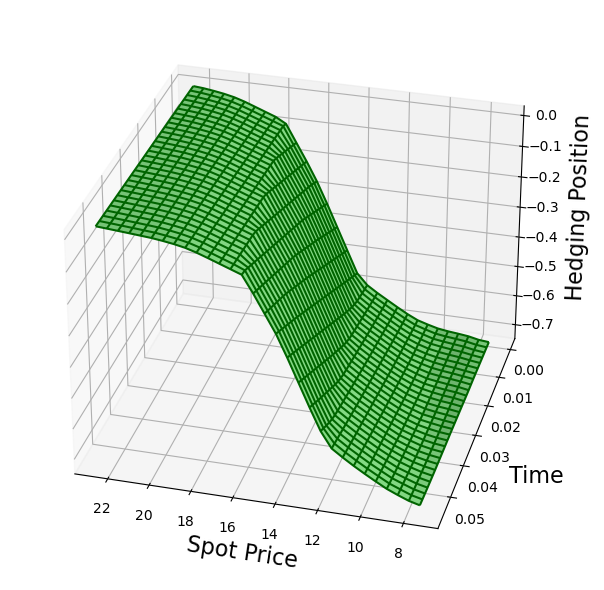

In [5]:
nr_discrete_points = 30 
times = np.linspace(0,T,nr_discrete_points+1)[:-1]
values = np.linspace(x_0-x_0*0.5,x_0+x_0*0.5,nr_discrete_points)
grid = np.zeros((nr_discrete_points,nr_discrete_points))
for i in range(len(times)):
    for j in range(len(values)):
        grid[i,j] = hedge([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]
        
X, Y = np.meshgrid(values, times)

style.use('default')
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(bottom=0.15)
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.plot_surface(X, Y , grid,color = "lightgreen")
ax.plot_wireframe(X, Y , grid,color = "darkgreen",label = "Hedge with uncertain parameters")

ax.view_init(30, 105)
ax.set_ylabel("Time", fontsize=16, labelpad=15)
ax.set_xlabel("Spot Price", fontsize=16)
ax.set_zlabel("Hedging Position", fontsize=16, labelpad=10)

plt.tight_layout()
plt.show()

We now look at the Hedging Error of this strategy

In [6]:
BATCH_SIZE = 50000 
t_k = np.linspace(0,T,n+1)
path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated = [hedge([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S = tf.reduce_sum([hedge_evaluated[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)])

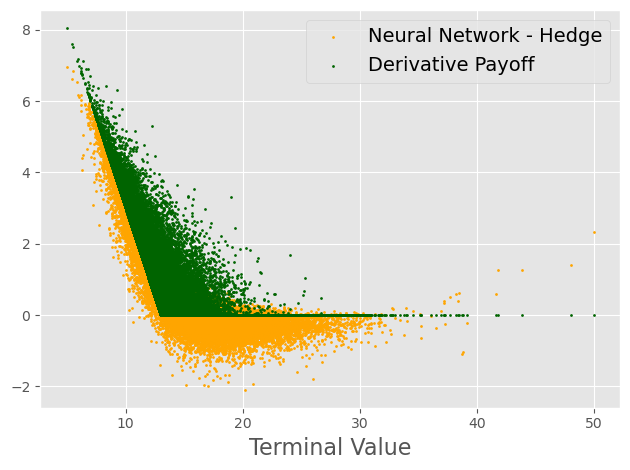

In [7]:
style.use('ggplot')
plt.scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price + delta_S,(BATCH_SIZE,1)),
            color = "orange",label = "Neural Network - Hedge",s=2)
plt.scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkgreen",label = "Derivative Payoff",s=2)
plt.xlabel("Terminal Value", fontsize=16)
plt.legend( fontsize=14)
plt.tight_layout()
plt.show()


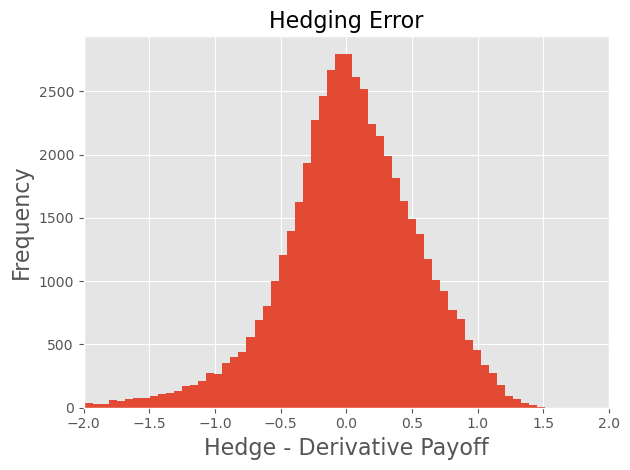

In [8]:
hedging_error = ((price + delta_S) - derivative_on_batch).numpy()
plt.hist(hedging_error,100)
plt.xlim([-2,2])
plt.xlabel("Hedge - Derivative Payoff", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title("Hedging Error", fontsize=16)
plt.tight_layout()
plt.show()


## Training of a hedging strategy with fixed parameters that lie in the middle of each of the already specified parameter intervals

In [9]:
T = 21 / 365 
n = 21 
a_0_fix = [0.6,0.6]
a_1_fix = [0.6,0.6]
b_0_fix = [0,0]
b_1_fix = [0,0]
gamma_fix = [1,1]
x_0 = 15.
def derivative(path):
    return tf.nn.relu(13-tf.math.reduce_min(path))

price_fix, hedge_fix = optimal_hedge(derivative,a_0_fix,a_1_fix,b_0_fix,b_1_fix,gamma_fix,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 1000,l_r = 0.0075,BATCH_SIZE =256)

  1%|          | 11/1000 [00:19<30:20,  1.84s/it]

Iteration:10, Price of Hedge: 0.30595070123672485, Loss: 0.631054699420929


  2%|▏         | 21/1000 [00:38<30:55,  1.90s/it]

Iteration:20, Price of Hedge: 0.3023586571216583, Loss: 0.35628339648246765


  3%|▎         | 31/1000 [00:56<31:24,  1.94s/it]

Iteration:30, Price of Hedge: 0.30448904633522034, Loss: 0.3302200436592102


  4%|▍         | 41/1000 [01:14<28:42,  1.80s/it]

Iteration:40, Price of Hedge: 0.3107817471027374, Loss: 0.27298739552497864


  5%|▌         | 51/1000 [01:32<26:03,  1.65s/it]

Iteration:50, Price of Hedge: 0.3148532211780548, Loss: 0.21473821997642517


  6%|▌         | 61/1000 [01:51<28:30,  1.82s/it]

Iteration:60, Price of Hedge: 0.3156746029853821, Loss: 0.2537381052970886


  7%|▋         | 71/1000 [02:09<28:44,  1.86s/it]

Iteration:70, Price of Hedge: 0.3178291618824005, Loss: 0.232541024684906


  8%|▊         | 81/1000 [02:28<28:52,  1.88s/it]

Iteration:80, Price of Hedge: 0.325007826089859, Loss: 0.20478029549121857


  9%|▉         | 91/1000 [02:47<29:39,  1.96s/it]

Iteration:90, Price of Hedge: 0.32589685916900635, Loss: 0.26332423090934753


 10%|█         | 101/1000 [03:05<28:50,  1.92s/it]

Iteration:100, Price of Hedge: 0.3267773687839508, Loss: 0.16643665730953217


 11%|█         | 111/1000 [03:23<26:14,  1.77s/it]

Iteration:110, Price of Hedge: 0.3293047547340393, Loss: 0.13190460205078125


 12%|█▏        | 121/1000 [03:40<24:28,  1.67s/it]

Iteration:120, Price of Hedge: 0.329014390707016, Loss: 0.13427390158176422


 13%|█▎        | 131/1000 [03:59<25:52,  1.79s/it]

Iteration:130, Price of Hedge: 0.32333430647850037, Loss: 0.09960183501243591


 14%|█▍        | 141/1000 [04:18<27:24,  1.91s/it]

Iteration:140, Price of Hedge: 0.32358935475349426, Loss: 0.10919318348169327


 15%|█▌        | 151/1000 [04:36<26:44,  1.89s/it]

Iteration:150, Price of Hedge: 0.3162170946598053, Loss: 0.12383270263671875


 16%|█▌        | 161/1000 [04:55<28:48,  2.06s/it]

Iteration:160, Price of Hedge: 0.3111700713634491, Loss: 0.16927418112754822


 17%|█▋        | 171/1000 [05:14<25:15,  1.83s/it]

Iteration:170, Price of Hedge: 0.3174913227558136, Loss: 0.10104791820049286


 18%|█▊        | 181/1000 [05:32<22:47,  1.67s/it]

Iteration:180, Price of Hedge: 0.323142409324646, Loss: 0.10533612221479416


 19%|█▉        | 191/1000 [05:50<23:35,  1.75s/it]

Iteration:190, Price of Hedge: 0.3239191472530365, Loss: 0.1188768595457077


 20%|██        | 201/1000 [06:08<24:13,  1.82s/it]

Iteration:200, Price of Hedge: 0.32714712619781494, Loss: 0.14234980940818787


 21%|██        | 211/1000 [06:27<24:38,  1.87s/it]

Iteration:210, Price of Hedge: 0.3269476890563965, Loss: 0.1006348505616188


 22%|██▏       | 221/1000 [06:45<24:31,  1.89s/it]

Iteration:220, Price of Hedge: 0.3233893811702728, Loss: 0.11407337337732315


 23%|██▎       | 231/1000 [07:06<27:27,  2.14s/it]

Iteration:230, Price of Hedge: 0.3166213929653168, Loss: 0.1339772790670395


 24%|██▍       | 241/1000 [07:23<19:56,  1.58s/it]

Iteration:240, Price of Hedge: 0.31457945704460144, Loss: 0.16948629915714264


 25%|██▌       | 251/1000 [07:41<21:12,  1.70s/it]

Iteration:250, Price of Hedge: 0.3157344162464142, Loss: 0.11166843771934509


 26%|██▌       | 261/1000 [08:00<23:33,  1.91s/it]

Iteration:260, Price of Hedge: 0.32253530621528625, Loss: 0.1143217533826828


 27%|██▋       | 271/1000 [08:20<24:49,  2.04s/it]

Iteration:270, Price of Hedge: 0.32568228244781494, Loss: 0.11910884082317352


 28%|██▊       | 281/1000 [08:39<22:44,  1.90s/it]

Iteration:280, Price of Hedge: 0.3240903317928314, Loss: 0.10660110414028168


 29%|██▉       | 291/1000 [08:58<22:19,  1.89s/it]

Iteration:290, Price of Hedge: 0.3271082639694214, Loss: 0.110934779047966


 30%|███       | 301/1000 [09:16<19:26,  1.67s/it]

Iteration:300, Price of Hedge: 0.3254263997077942, Loss: 0.1273411065340042


 31%|███       | 311/1000 [09:35<20:36,  1.79s/it]

Iteration:310, Price of Hedge: 0.3288124203681946, Loss: 0.07942835241556168


 32%|███▏      | 321/1000 [09:53<21:01,  1.86s/it]

Iteration:320, Price of Hedge: 0.33055442571640015, Loss: 0.11197973787784576


 33%|███▎      | 331/1000 [10:12<21:24,  1.92s/it]

Iteration:330, Price of Hedge: 0.33026814460754395, Loss: 0.09420737624168396


 34%|███▍      | 341/1000 [10:31<20:52,  1.90s/it]

Iteration:340, Price of Hedge: 0.3300324082374573, Loss: 0.10808911919593811


 35%|███▌      | 351/1000 [10:49<20:57,  1.94s/it]

Iteration:350, Price of Hedge: 0.3345831334590912, Loss: 0.11706195026636124


 36%|███▌      | 361/1000 [11:07<18:06,  1.70s/it]

Iteration:360, Price of Hedge: 0.3319258987903595, Loss: 0.13028521835803986


 37%|███▋      | 371/1000 [11:24<17:12,  1.64s/it]

Iteration:370, Price of Hedge: 0.3248554766178131, Loss: 0.12601333856582642


 38%|███▊      | 381/1000 [11:43<18:48,  1.82s/it]

Iteration:380, Price of Hedge: 0.32657358050346375, Loss: 0.113652303814888


 39%|███▉      | 391/1000 [12:02<19:03,  1.88s/it]

Iteration:390, Price of Hedge: 0.32740363478660583, Loss: 0.12295205891132355


 40%|████      | 401/1000 [12:20<18:31,  1.86s/it]

Iteration:400, Price of Hedge: 0.32832157611846924, Loss: 0.08826489746570587


 41%|████      | 411/1000 [12:39<18:23,  1.87s/it]

Iteration:410, Price of Hedge: 0.33020922541618347, Loss: 0.08506030589342117


 42%|████▏     | 421/1000 [12:53<15:17,  1.58s/it]

Iteration:420, Price of Hedge: 0.32270732522010803, Loss: 0.0882774069905281


 43%|████▎     | 431/1000 [13:11<18:30,  1.95s/it]

Iteration:430, Price of Hedge: 0.3249891400337219, Loss: 0.07197606563568115


 44%|████▍     | 441/1000 [13:26<14:03,  1.51s/it]

Iteration:440, Price of Hedge: 0.32823067903518677, Loss: 0.06705895066261292


 45%|████▌     | 451/1000 [13:42<16:05,  1.76s/it]

Iteration:450, Price of Hedge: 0.3261411190032959, Loss: 0.07945755124092102


 46%|████▌     | 461/1000 [13:56<14:16,  1.59s/it]

Iteration:460, Price of Hedge: 0.32459211349487305, Loss: 0.07530288398265839


 47%|████▋     | 471/1000 [14:11<13:55,  1.58s/it]

Iteration:470, Price of Hedge: 0.32692983746528625, Loss: 0.10094618797302246


 48%|████▊     | 481/1000 [14:26<14:41,  1.70s/it]

Iteration:480, Price of Hedge: 0.32637113332748413, Loss: 0.174374520778656


 49%|████▉     | 491/1000 [14:44<14:53,  1.76s/it]

Iteration:490, Price of Hedge: 0.32484784722328186, Loss: 0.08696503937244415


 50%|█████     | 501/1000 [15:02<15:34,  1.87s/it]

Iteration:500, Price of Hedge: 0.33309993147850037, Loss: 0.13781538605690002


 51%|█████     | 511/1000 [15:20<16:25,  2.02s/it]

Iteration:510, Price of Hedge: 0.3260214030742645, Loss: 0.10374467819929123


 52%|█████▏    | 521/1000 [15:38<14:35,  1.83s/it]

Iteration:520, Price of Hedge: 0.3180863857269287, Loss: 0.12859514355659485


 53%|█████▎    | 531/1000 [15:55<13:44,  1.76s/it]

Iteration:530, Price of Hedge: 0.3176913857460022, Loss: 0.11868902295827866


 54%|█████▍    | 541/1000 [16:14<14:56,  1.95s/it]

Iteration:540, Price of Hedge: 0.32296299934387207, Loss: 0.08011408895254135


 55%|█████▌    | 551/1000 [16:44<26:06,  3.49s/it]

Iteration:550, Price of Hedge: 0.3297886550426483, Loss: 0.2609291076660156


 56%|█████▌    | 561/1000 [17:01<12:26,  1.70s/it]

Iteration:560, Price of Hedge: 0.3309756815433502, Loss: 0.1476685255765915


 57%|█████▋    | 571/1000 [17:19<12:07,  1.70s/it]

Iteration:570, Price of Hedge: 0.3242871165275574, Loss: 0.13365919888019562


 58%|█████▊    | 581/1000 [17:36<12:03,  1.73s/it]

Iteration:580, Price of Hedge: 0.3202574551105499, Loss: 0.0977151170372963


 59%|█████▉    | 591/1000 [17:57<13:53,  2.04s/it]

Iteration:590, Price of Hedge: 0.32219749689102173, Loss: 0.14321942627429962


 60%|██████    | 601/1000 [18:16<12:54,  1.94s/it]

Iteration:600, Price of Hedge: 0.3254714012145996, Loss: 0.12661662697792053


 61%|██████    | 611/1000 [18:34<12:22,  1.91s/it]

Iteration:610, Price of Hedge: 0.3248577117919922, Loss: 0.10291513800621033


 62%|██████▏   | 621/1000 [18:52<10:32,  1.67s/it]

Iteration:620, Price of Hedge: 0.32855796813964844, Loss: 0.09098288416862488


 63%|██████▎   | 631/1000 [19:13<12:24,  2.02s/it]

Iteration:630, Price of Hedge: 0.3323669135570526, Loss: 0.08499345183372498


 64%|██████▍   | 641/1000 [19:34<12:54,  2.16s/it]

Iteration:640, Price of Hedge: 0.3296712338924408, Loss: 0.1560756117105484


 65%|██████▌   | 651/1000 [19:57<12:02,  2.07s/it]

Iteration:650, Price of Hedge: 0.3203095495700836, Loss: 0.08308486640453339


 66%|██████▌   | 661/1000 [20:18<11:45,  2.08s/it]

Iteration:660, Price of Hedge: 0.320980429649353, Loss: 0.09663355350494385


 67%|██████▋   | 671/1000 [20:38<11:27,  2.09s/it]

Iteration:670, Price of Hedge: 0.3262249231338501, Loss: 0.09863191843032837


 68%|██████▊   | 681/1000 [20:58<10:57,  2.06s/it]

Iteration:680, Price of Hedge: 0.3293823301792145, Loss: 0.0936708003282547


 69%|██████▉   | 691/1000 [21:18<09:49,  1.91s/it]

Iteration:690, Price of Hedge: 0.3227747976779938, Loss: 0.10689003020524979


 70%|███████   | 701/1000 [21:39<10:31,  2.11s/it]

Iteration:700, Price of Hedge: 0.3190893828868866, Loss: 0.08994366228580475


 71%|███████   | 711/1000 [22:00<10:40,  2.22s/it]

Iteration:710, Price of Hedge: 0.3230963945388794, Loss: 0.11221948266029358


 72%|███████▏  | 721/1000 [22:21<08:58,  1.93s/it]

Iteration:720, Price of Hedge: 0.3243769705295563, Loss: 0.06786561757326126


 73%|███████▎  | 731/1000 [22:42<09:11,  2.05s/it]

Iteration:730, Price of Hedge: 0.3208939731121063, Loss: 0.08840753138065338


 74%|███████▍  | 741/1000 [23:02<09:01,  2.09s/it]

Iteration:740, Price of Hedge: 0.32972297072410583, Loss: 0.07601161301136017


 75%|███████▌  | 751/1000 [23:23<08:40,  2.09s/it]

Iteration:750, Price of Hedge: 0.3321830630302429, Loss: 0.0992240309715271


 76%|███████▌  | 761/1000 [23:42<07:38,  1.92s/it]

Iteration:760, Price of Hedge: 0.3188333213329315, Loss: 0.08894865959882736


 77%|███████▋  | 771/1000 [24:03<07:56,  2.08s/it]

Iteration:770, Price of Hedge: 0.31911957263946533, Loss: 0.0677226334810257


 78%|███████▊  | 781/1000 [24:23<07:32,  2.07s/it]

Iteration:780, Price of Hedge: 0.3233000934123993, Loss: 0.07608717679977417


 79%|███████▉  | 791/1000 [24:43<06:47,  1.95s/it]

Iteration:790, Price of Hedge: 0.32375243306159973, Loss: 0.09047327190637589


 80%|████████  | 801/1000 [25:02<06:34,  1.98s/it]

Iteration:800, Price of Hedge: 0.32971903681755066, Loss: 0.07342201471328735


 81%|████████  | 811/1000 [25:23<06:20,  2.01s/it]

Iteration:810, Price of Hedge: 0.3278874158859253, Loss: 0.07195389270782471


 82%|████████▏ | 821/1000 [25:43<06:09,  2.07s/it]

Iteration:820, Price of Hedge: 0.3209731876850128, Loss: 0.08872245997190475


 83%|████████▎ | 831/1000 [26:03<05:35,  1.98s/it]

Iteration:830, Price of Hedge: 0.3221849203109741, Loss: 0.062148358672857285


 84%|████████▍ | 841/1000 [26:23<05:12,  1.96s/it]

Iteration:840, Price of Hedge: 0.32890865206718445, Loss: 0.06237383931875229


 85%|████████▌ | 851/1000 [26:43<05:02,  2.03s/it]

Iteration:850, Price of Hedge: 0.32524535059928894, Loss: 0.06422686576843262


 86%|████████▌ | 861/1000 [27:04<04:54,  2.12s/it]

Iteration:860, Price of Hedge: 0.314653217792511, Loss: 0.08212476968765259


 87%|████████▋ | 871/1000 [27:24<04:18,  2.00s/it]

Iteration:870, Price of Hedge: 0.32306739687919617, Loss: 0.08003818243741989


 88%|████████▊ | 881/1000 [27:45<04:15,  2.15s/it]

Iteration:880, Price of Hedge: 0.33618536591529846, Loss: 0.11207368224859238


 89%|████████▉ | 891/1000 [28:04<03:30,  1.93s/it]

Iteration:890, Price of Hedge: 0.3211633265018463, Loss: 0.06964387744665146


 90%|█████████ | 901/1000 [28:24<03:27,  2.09s/it]

Iteration:900, Price of Hedge: 0.3189306855201721, Loss: 0.07007455825805664


 91%|█████████ | 911/1000 [28:44<02:58,  2.01s/it]

Iteration:910, Price of Hedge: 0.3229309320449829, Loss: 0.089167520403862


 92%|█████████▏| 921/1000 [29:05<02:38,  2.01s/it]

Iteration:920, Price of Hedge: 0.32909083366394043, Loss: 0.061318349093198776


 93%|█████████▎| 931/1000 [29:27<02:28,  2.15s/it]

Iteration:930, Price of Hedge: 0.32111436128616333, Loss: 0.06941888481378555


 94%|█████████▍| 941/1000 [29:47<02:02,  2.07s/it]

Iteration:940, Price of Hedge: 0.31685760617256165, Loss: 0.0939389318227768


 95%|█████████▌| 951/1000 [30:07<01:34,  1.93s/it]

Iteration:950, Price of Hedge: 0.32664498686790466, Loss: 0.09504515677690506


 96%|█████████▌| 961/1000 [30:28<01:20,  2.07s/it]

Iteration:960, Price of Hedge: 0.3328342139720917, Loss: 0.07914062589406967


 97%|█████████▋| 971/1000 [30:49<01:02,  2.14s/it]

Iteration:970, Price of Hedge: 0.32995960116386414, Loss: 0.07500801980495453


 98%|█████████▊| 981/1000 [31:09<00:36,  1.92s/it]

Iteration:980, Price of Hedge: 0.3226372003555298, Loss: 0.0686831995844841


 99%|█████████▉| 991/1000 [31:28<00:16,  1.82s/it]

Iteration:990, Price of Hedge: 0.3214002549648285, Loss: 0.0544758141040802


100%|██████████| 1000/1000 [31:45<00:00,  1.91s/it]


We can now display the trained non-robust strategy in a graph of the same form.

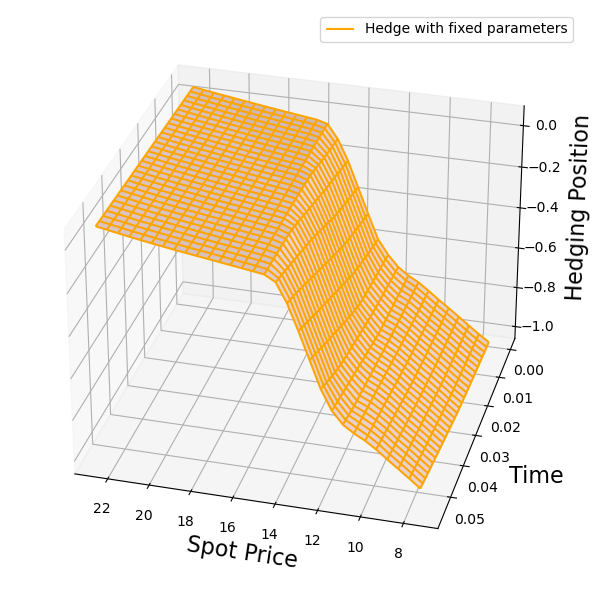

In [10]:
nr_discrete_points = 30 
times = np.linspace(0,T,nr_discrete_points+1)[:-1]
values = np.linspace(x_0-x_0*0.5,x_0+x_0*0.5,nr_discrete_points)
grid_fix = np.zeros((nr_discrete_points,nr_discrete_points))
for i in range(len(times)):
    for j in range(len(values)):
        grid_fix[i,j] = hedge_fix([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]

X, Y = np.meshgrid(values, times)

style.use('default')
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(bottom=0.15)
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax.plot_wireframe(X, Y , grid_Delta_hedge,color = "darkred",label = "Delta-Hedge")
ax.plot_surface(X, Y , grid_fix,color = "mistyrose")
ax.plot_wireframe(X, Y , grid_fix,color = "orange",label = "Hedge with fixed parameters")

ax.view_init(30, 105)
ax.set_ylabel("Time", fontsize=16, labelpad=15)
ax.set_xlabel("Spot Price", fontsize=16)
ax.set_zlabel("Hedging Position", fontsize=16, labelpad=10)
plt.legend()
plt.tight_layout()
plt.show()

Compare the hedge strategies

In [11]:
style.use('ggplot')
BATCH_SIZE = 50000 
t_k = np.linspace(0,T,n+1)


path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated_fix = [hedge_fix([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S_fix = tf.reduce_sum([hedge_evaluated_fix[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch_fix = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)])


path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated = [hedge([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S = tf.reduce_sum([hedge_evaluated[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)]) 

Compare how the hedge strategies perform.

C:\Users\User\AppData\Local\Temp\ipykernel_1192\421755468.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


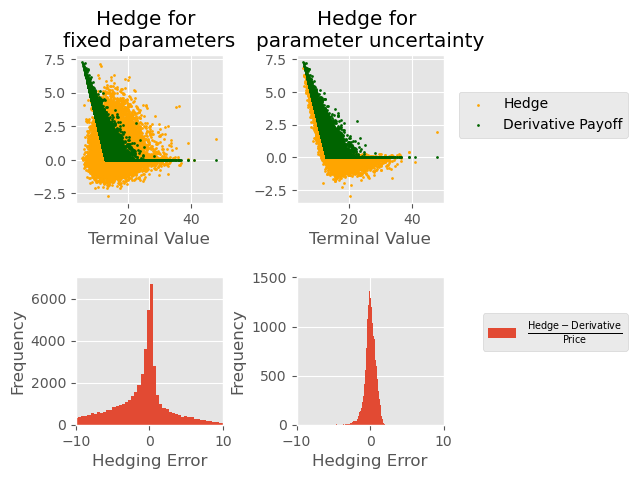

In [12]:
style.use('ggplot')
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5,wspace = 0.5,right=0.7)
axs[0,0].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price_fix + delta_S_fix,(BATCH_SIZE,1)),
            color = "orange",label = "Hedge",s=2)
axs[0,0].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkgreen",label = "Derivative Payoff",s=2)
axs[0,0].set_xlabel("Terminal Value")
axs[0,0].set_title("Hedge for \nfixed parameters")
axs[0,0].legend(loc = 0, bbox_to_anchor=(3.8, 0.8))

axs[0,1].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price + delta_S,(BATCH_SIZE,1)),
            color = "orange",label = "Hedge",s=2)
axs[0,1].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkgreen",label = "Derivative",s=2)
axs[0,1].set_xlabel("Terminal Value")
axs[0,1].set_title("Hedge for \nparameter uncertainty")

hedging_error_fix = (((price_fix + delta_S_fix) - derivative_on_batch)/price_fix).numpy()
axs[1,0].hist(hedging_error_fix,100,label = r"$\frac{\mathrm{Hedge}-\mathrm{Derivative}}{\mathrm{Price}}$")
axs[1,0].set_ylabel("Frequency")
axs[1,0].set_xlim([-10,10])
axs[1,0].set_xlabel("Hedging Error")
axs[1,0].legend(loc = 0, bbox_to_anchor=(3.8, 0.8))

hedging_error = (((price + delta_S) - derivative_on_batch)/price).numpy()
axs[1,1].hist(hedging_error,200)
axs[1,1].set_xlabel("Hedging Error")
axs[1,1].set_xlim([-10,10])
axs[1,1].set_ylabel("Frequency")

fig.show()

Adjusted Histogram: Difference between hedging errors

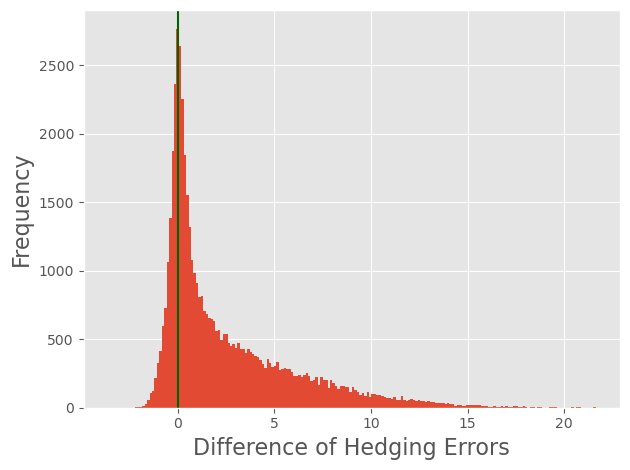

In [14]:
hedging_difference = np.abs(hedging_error_fix) - np.abs(hedging_error)
plt.hist(hedging_difference,200)
plt.axvline(x=0,color="darkgreen")
plt.xlabel("Difference of Hedging Errors", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.tight_layout()
plt.show()

## Statistics on Relative Hedging Errors

Fixed Parameters:

In [15]:
pd.DataFrame(np.abs(hedging_error_fix)).describe()

,0
count,50000.000000
mean,3.068251
std,3.480257
min,0.000030
25%,0.450307
50%,1.617916
75%,4.678851
max,22.846395


Robust Parameters:

In [16]:
pd.DataFrame(np.abs(hedging_error)).describe()

,0
count,50000.000000
mean,0.539521
std,0.466116
min,0.000010
25%,0.191874
50%,0.420789
75%,0.768207
max,5.525743


## Statistics on Absolute Hedging Errors

Fixed Parameters:

In [17]:
pd.DataFrame(np.abs(hedging_error_fix)*price_fix).describe()

,0
count,50000.000000
mean,0.984494
std,1.116701
min,0.000010
25%,0.144489
50%,0.519137
75%,1.501291
max,7.330665


Robust Parameters:

In [18]:
pd.DataFrame(np.abs(hedging_error)*price).describe()

,0
count,50000.000000
mean,0.408119
std,0.352593
min,0.000007
25%,0.145143
50%,0.318304
75%,0.581108
max,4.179935
